In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme("chesterish")

In [1]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits

# currently: |0>, |0>

circuit.x(0)

# currently: |1>, |0>

circuit.cx(0,1)  # cnot, controlled not. Flips target if control is 1

# currently: |1>, |1>

circuit.measure([0,1],[0,1])

circuit.draw()


┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

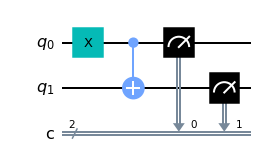

In [2]:
circuit.draw(output="mpl")

In [4]:
from qiskit import IBMQ

IBMQ.save_account("ae2f22897a8d8149d478fcb9878abf6f6d23e5b056a2857386462a31c318ad29300ae747b401a1ae3b7f23ecbadf3277728dbed3cedc0c4be838171be30bb0ad")

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
        
        

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmq_lima has 48 queued and 5 qubits
ibmq_belem has 318 queued and 5 qubits
ibmq_quito has 49 queued and 5 qubits
simulator_statevector has 2 queued and simulated qubits
simulator_mps has 2 queued and simulated qubits
simulator_extended_stabilizer has 2 queued and simulated qubits
simulator_stabilizer has 2 queued and simulated qubits
ibmq_manila has 41 queued and 5 qubits
ibm_nairobi has 43 queued and 7 qubits
ibm_oslo has 78 queued and 7 qubits


In [15]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_lima")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


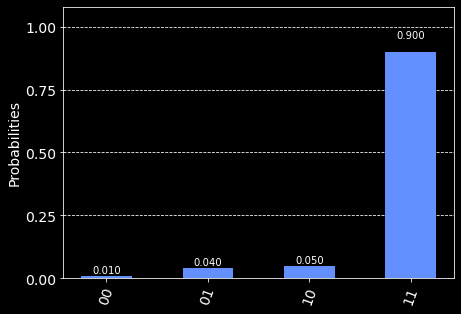

In [17]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [18]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits

# currently: |0>, |0>

circuit.h(0) # Hadamard gate, puts qubit 0 into superposition state

# currently: 1/2|0> + 1/2|1>, |0>

circuit.cx(0,1)  # cnot, controlled not. Flips target if control is 1

# currently: 

circuit.measure([0,1],[0,1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [19]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


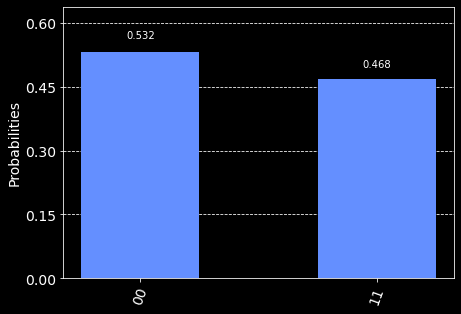

In [20]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [26]:
from qiskit import Aer #simulator framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")

Aer.backends()


[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Job Status: job has successfully run


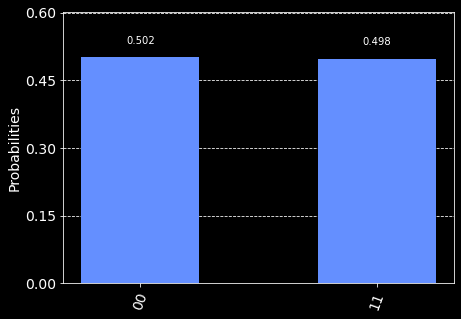

In [27]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])